### 남의 것 가져다 쓰는 방법 3가지

1. 데코레이터
2. 상속
3. 컴포지션


### 이미지 관련된 3가지 패키지

1. PIL: 파이토닉하다. 
2. scikit-image: 연구할 때 많이 쓴다.
3. OpenCv

In [1]:
import imageio # 넘파이를 상속해서 이미지 관련된 애들을 추가시킨 것이다.
import numpy as np

In [2]:
im = imageio.imread('C:/aaa.png')
im_array = np.array(im)

In [3]:
issubclass(type(im), type(im_array))

True

In [4]:
im.shape
im.dtype # 넘파이에 있는거 다 할 수 있다.

dtype('uint8')

### einsum

In [5]:
np.array([1, 2]) * np.array([3, 4])

array([3, 8])

In [6]:
np.array([[1, 2]]) @ np.array([3, 4]) # 브로드캐스팅해준다.

array([11])

브로드캐스팅할려면, 1개 축만 남도록 해야 한다.

In [7]:
A = np.array([0, 1, 2])
B = np.array([[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, 10, 11]])

In [8]:
(A[:, np.newaxis] * B).sum(axis = 1)

array([ 0, 22, 76])

In [11]:
A = np.eye(10)
np.einsum('kk->k', A)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [12]:
x = np.array([[1, 2], [3, 4]])
np.einsum('kk->', x) # -> 뒤에 값이 없으면 합을 구하라는 의미이다.
# 아인슈타인이 만들었다.

5

In [13]:
x = np.array([[1, 2], [3, 4]])
np.einsum('kl->', x) # 모든 원소들에 대해서 계산해준다.

10

In [17]:
x = np.array([[1, 2], [3, 4]])
np.einsum('kl->l', x) # l은 열이니까 열합이네.
np.einsum('kl->k', x) # k은 행이니까 행합이네.

array([3, 7])

In [19]:
a = np.arange(6).reshape(2, 3)
print(a)

[[0 1 2]
 [3 4 5]]


In [20]:
b = np.arange(3)
print(b)
np.einsum('ik,k->i',a,b) # 곱하기+더하기이다. ik는 a에 해당하는 것이고, k는 b에 해당하는 것이다.

[0 1 2]


array([ 5, 14])

In [22]:
b = np.arange(15).reshape(3, 5)
print(b)
np.einsum('ik,kj->ij',a,b) # 이렇게 매트릭스 연산도 가능하다.

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


array([[ 25,  28,  31,  34,  37],
       [ 70,  82,  94, 106, 118]])

### 내적

In [23]:
b = np.arange(3) # 0 1 2
c = np.arange(3, 6) # 3 4 5
np.einsum('i,i->', b, c) # 같은 위치에 있는 애들

14

In [25]:
np.einsum('i,j->', b, c) # 내적 연산

36

In [26]:
b

array([0, 1, 2])

In [27]:
b = np.arange(6, 12).reshape(2, 3)
np.einsum('ij,ij->', a, b) # 위치 같은 애들끼리 곱하는 거다. (원소곱)

145

In [29]:
b = np.arange(6, 12).reshape(2, 3)
np.einsum('ij,ij->ij', a, b) # 각각 곱한 결과값을 행렬로!

array([[ 0,  7, 16],
       [27, 40, 55]])

세그멘테이션? : 영역을 분리하는 것이다. 사람이 있는 영역, 개가 있는 영역 등...

In [30]:
from skimage import data, draw, exposure # 연구 목적의 모듈들이 많다.
import matplotlib.pyplot as plt

In [31]:
img = data.astronaut()

In [33]:
img.shape

(512, 512, 3)

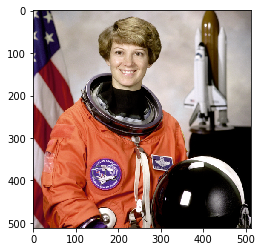

In [34]:
plt.imshow(img)

In [38]:
rec = draw.rectangle((10, 10),(100, 100))
rec_np = np.array(rec)
print(rec_np.shape)
# rec_np = np.swapaxes(rec_np, 0, 1)
# rec_np = np.swapaxes(rec_np, 1, 2)

(2, 91, 91)


TypeError: Invalid shape (2, 91, 91) for image data

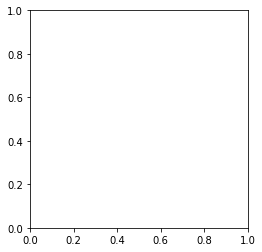

In [39]:
plt.imshow(rec_np)

In [40]:
a, b = exposure.histogram(img)

C:\Users\white\Anaconda3\envs\tf2.0-gpu\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  """Entry point for launching an IPython kernel.


(array([26., 25., 26., 25., 26., 25., 26., 25., 26., 26.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

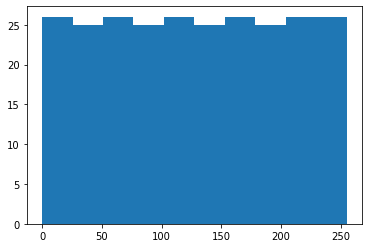

In [41]:
plt.hist(b)